In [47]:
from utils import rf

### 問 8.2 (柴田)
FindMultipleOfK問題
- 入力: 正整数$K$, セミコロン, 正整数$m_1, m_2,\dots$のリストという形式のASCII文字列. 個々の$m_i$と$K$は10進数表記で, $m_i$は空白文字で区切られているものとする. 例: "823;18910 5235 3422"
- 解: 解は, $K$の倍数になっている任意の値$m_i$である. $m_i$の中に$K$の倍数が含まれていなければ, 解は"no"となる. 例: 上の入力の場合, 18910, 5235, 3422はいずれも823で割り切れないので解は"no"となる. 入力"10;720 342 90"の場合, 解集合は{"720", "90"}である.

入力の個々の$m_i$ごとに別々のスレッドを使ってFindMultipleOfK問題を解く非決定性Pythonプログラムを書け.

In [42]:
import utils; from utils import rf
from threading import Thread 

# function that searches the given input for four different strings, in parallel
def FindMultipleOfK(inString): 
    # change input as int 
    K = int(inString.split(";")[0])
    m_is = list(map(int, inString.split(";")[1].split()))
    
    # create an empty list that will store our threads
    threads = [ ] 

    # create an object that can store a nondeterministic solution computed by
    # other threads
    ndSoln = utils.NonDetSolution() 

    # create the threads that will perform the nondeterministic computation
    for m in m_is: 
        # create a thread that will execute judgeDivisible(m, K, ndSoln)
        # when started; judgeDivisible is a helper function defined below
        t = Thread(target=judgeDivisible,    
                           args = (m, K, ndSoln)) 
        # append the newly created thread to our list of threads
        threads.append(t) 
    
    # Perform the nondeterministic computation. By definition, this means
    # that each thread is started, and we get a return value if either (a)
    # any thread reports a positive solution, or (b) all threads report
    # negative solutions.
    solution = utils.waitForOnePosOrAllNeg(threads, ndSoln) 

    return solution 

# judgeDivisible is a helper function that sets the nondeterministic solution to the
# value of str(m) if the m is divisible by K. This function is
# intended to be executed in a separate thread as part of a nondeterministic
# computation.
def judgeDivisible(m, K, ndSoln):  
    if m % K == 0: 
        ndSoln.setSolution(str(m)) 


In [44]:
print(FindMultipleOfK("823;18910 5235 3422"))
print(FindMultipleOfK("10;720 342 90"))

no
90


### 問 8.7 (柴田)

"CG...GC", "CA...AC", "CT...TC"という3パターンのいずれかを含む遺伝子文字列を探索する非決定性チューリングマシンを作れ.
"..."は0個以上の文字による文字列を表し、入力は"x"で囲まれていると仮定してよい.


### 回答
Cが見つかるまで右に進み, Cが見つかった段階で4つのクローンに遷移する.
- "G...GC"のパターンの有無を判定するクローン
- "A...AC"のパターンの有無を判定するクローン
- "T...TC"のパターンの有無を判定するクローン
- 次の"C"を探すクローン

(Cの次の文字を確認してから応じたパターンの有無を判定するクローンと戻ってまたCを探すクローンの方が効率がよい？)

ASCII表現をq8_7.tmに保存した.

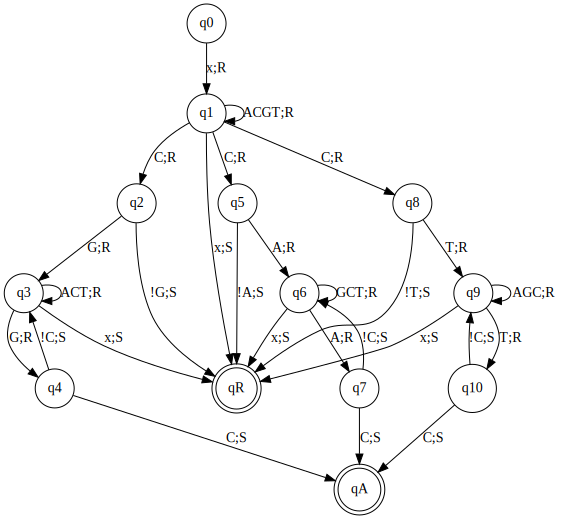

In [52]:
import sys
sys.path.append("../chapter5")
from tm_to_diagram import tm_to_diagram
tm_to_diagram(rf("q8_7.tm"))